**importing required lib**

In [19]:
import pandas as pd
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

**loading dataset**

In [20]:

from google.colab import files
uploaded =files.upload()

Saving NSE.csv to NSE.csv


In [21]:

df=pd.read_csv("NSE.csv")

**Data Cleaning and Sorting by date **

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
print(df)

In [ ]:
df.isnull().sum()

In [ ]:
df = df.sort_values('Date')
df.head()

**Make a copy of the original DataFrame**

In [ ]:
copy_df = df.copy()
copy_df

In [ ]:

copy_df.reset_index(inplace =True)
copy_df


In [ ]:
# Let's see correlation matrix...
copy_df.corr()

In [ ]:
# Considering only `Close` variable...

close_df = copy_df["Close"]
close_df

**Training Model**

In [67]:
train_size = int(len(close_df)*0.7)
test_size = len(close_df) - train_size
train_data = close_df[:train_size, :] # Slicing row from 0 to train_size indexlocation but column is kept unsliced.
test_data = close_df[train_size:len(close_df), :1]


In [ ]:
train_data.shape

In [ ]:
test_data[:10]

In [ ]:
test_data.shape

** Exploration and Analysis of Datasets.**

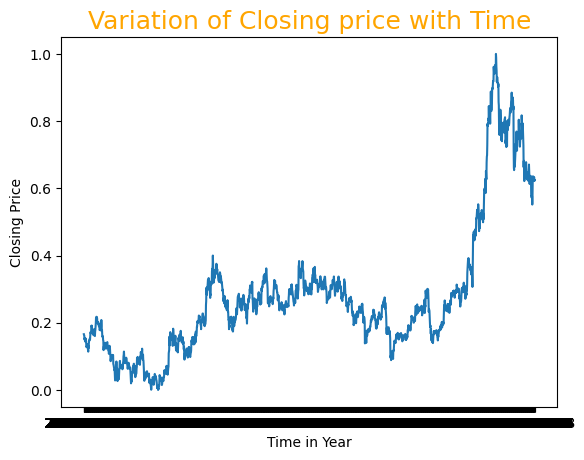

In [120]:
plt.plot(copy_df.Date, close_df)
plt.xlabel("Time in Year")
plt.ylabel("Closing Price");
plt.title("Variation of Closing price with Time",
          color="orange",
          fontsize=18);

Text(0.5, 1.0, 'Open')

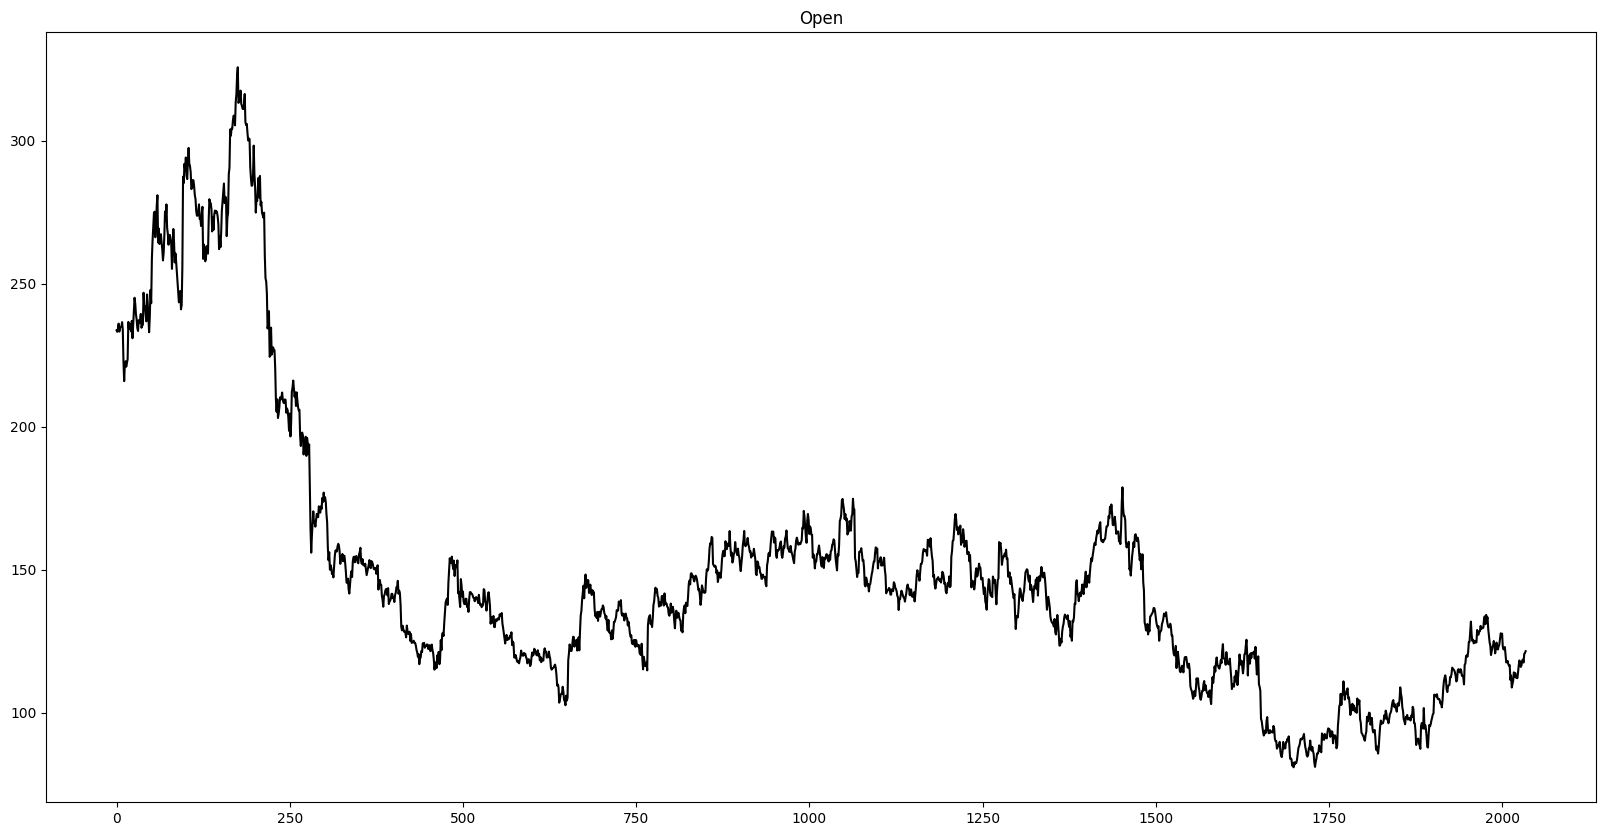

In [61]:
plt.subplots(figsize = (20,10))
plt.plot(df['Close'] , color ="black")
plt.title("Open")


In [ ]:
close_df = scaler.fit_transform(np.array(close_df).reshape(-1,1))
close_df

**Preprocessing by MinMax Scaler**.

In [128]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0,1)) # (0,1) by default.But mentioned for understanding
close_df= minmax.fit_transform(np.array(close_df).reshape(-1, 1))
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

**Preparing our dataset for training, fitting and testing of LSTM model**


In [129]:
#This function will create dataset as mentioned above...

def create_dataset(dataset, time_step):
    X_data = []
    Y_data = []
    for i in range(len(dataset)-time_step-1):
        X_data.append(dataset[i:(i+time_step), 0])
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [131]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [130]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [132]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_preds))

0.23866010167417476

In [133]:
train_preds.shape

(1323, 1)

**Plotting the graph according to train and test data**



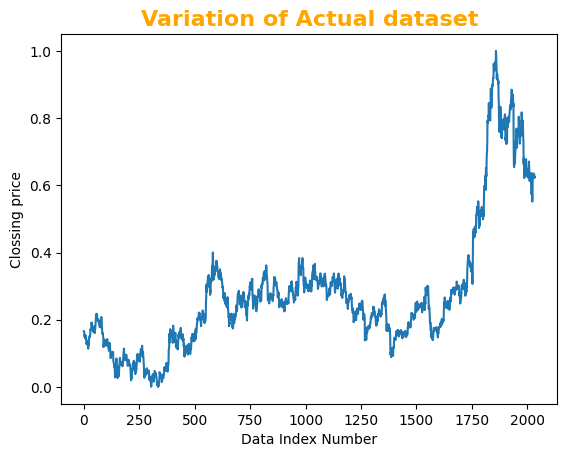

In [134]:


look_back=100  # to align predicted and actual on same curve...

trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_preds)+look_back, :] = train_preds

# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+(look_back*2)+1:len(close_df)-1, :] = test_preds

# plot baseline i.e. Actual value of Closing price..

plt.plot(minmax.inverse_transform(close_df))
plt.title("Variation of Actual dataset", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

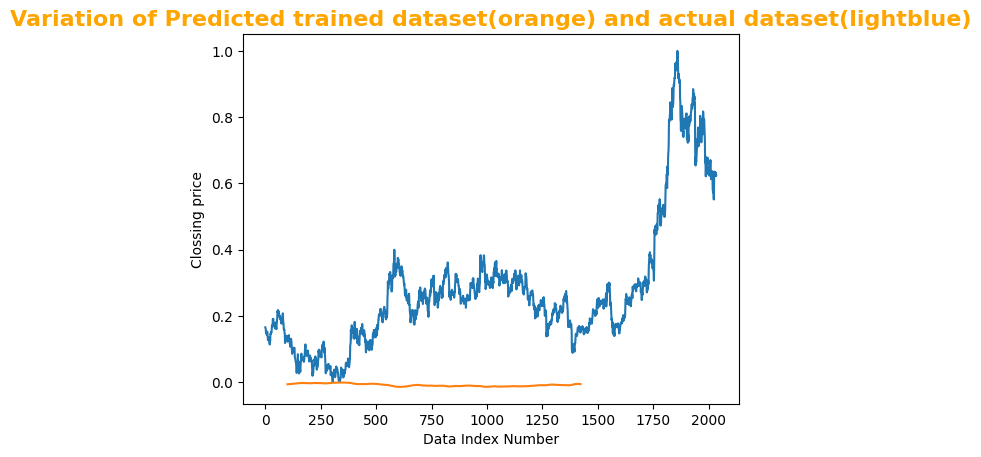

In [203]:
# Plot of Predictions on Closing Price made by our model on training dataset vs Actual Closing Price

plt.plot(minmax.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("Variation of Predicted trained dataset(orange) and actual dataset(lightblue)", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

In [135]:
len(test_data)

611

In [ ]:
preds_input = test_data[511:]
preds_input[:5]

In [138]:
temp_input = list(preds_input)
len(temp_input)

100

In [139]:
temp_input = temp_input[0].tolist()

In [141]:
#demonstrating prediction for next 30 days

preds_input.shape[1]


Thirty_days_output=[]
i=0

while(i<30):
    if(len(temp_input)>100):
        temp_input = temp_input[1:]
        preds_input=np.array(temp_input) # getting latest 100 data
        preds_input=preds_input.reshape(1,-1)



    preds_input = preds_input.reshape((1, time_step,1))
    day_output = model.predict(preds_input, verbose=0)
    temp_input.extend(day_output[0].tolist())
    Thirty_days_output.extend(day_output.tolist())

    #print(f"Day-{i+1} input:\n\n{preds_input}\n\n")
    #print(f"Day-{i+1} output:\n\n{day_output}\n\n")
    i=i+1
print(Thirty_days_output)


[[-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345], [-0.02686006762087345]]


In [145]:
latest_100_days = np.arange(1,101)
predicted_30_days = np.arange(101,131)

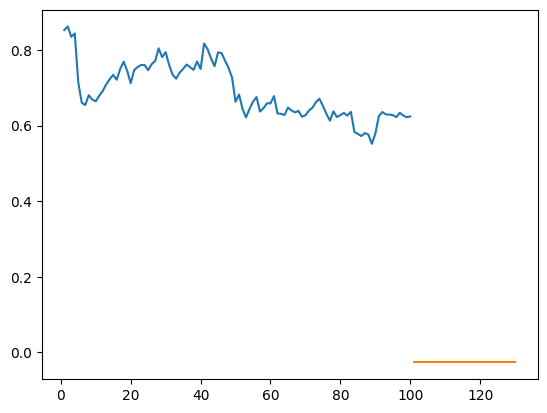

In [146]:
Latest_100_days_output = close_df[1935:]
plt.plot(latest_100_days, minmax.inverse_transform(Latest_100_days_output))
plt.plot(predicted_30_days, minmax.inverse_transform(Thirty_days_output))

In [ ]:
Latest_100_days_output_list = Latest_100_days_output.tolist()
Latest_100_days_output_list.extend(Thirty_days_output)
print(len(Latest_100_days_output_list))

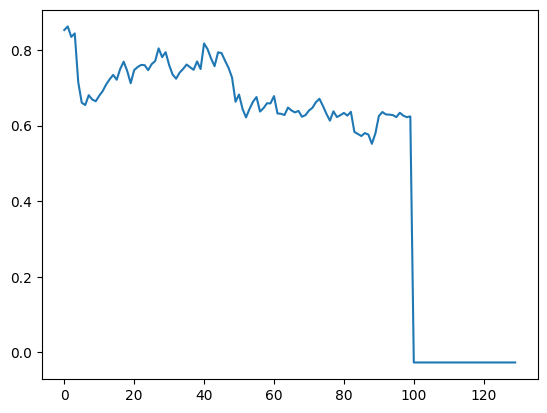

In [149]:
plt.plot(minmax.inverse_transform(Latest_100_days_output_list));

** Constructing Stacked LSTM model.**

In [150]:

# Constructing our stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1))) #Input layer with 50 neurons
model.add(LSTM(50, return_sequences=True)) # Hidden layers with 50 neurons
model.add(LSTM(50))
model.add(Dense(1))# Output Layer
model.compile(loss='mean_squared_error', optimizer='adam')

In [151]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [242]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 7s 162ms/step - loss: 0.0092 - val_loss: 0.0017
Epoch 2/60
19/19 [==============================] - 2s 116ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3/60
19/19 [==============================] - 2s 118ms/step - loss: 9.9278e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 2s 115ms/step - loss: 8.5894e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 3s 152ms/step - loss: 8.1763e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 2s 117ms/step - loss: 8.1065e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 2s 118ms/step - loss: 7.4652e-04 - val_loss: 9.6712e-04
Epoch 8/60
19/19 [==============================] - 2s 118ms/step - loss: 7.4611e-04 - val_loss: 9.4878e-04
Epoch 9/60
19/19 [==============================] - 2s 118ms/step - loss: 7.2059e-04 - val_loss: 9.8619e-04
Epoch 10/60
19/19 [==============================] - 3s 154m

In [152]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 46ms/step


In [153]:
train_preds = minmax.inverse_transform(model.predict(X_train))
test_preds = minmax.inverse_transform(model.predict(X_test))

16/16 [==============================] - 1s 44ms/step


In [154]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test  = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [155]:
stk=df.copy()
stk['Date'].min()
stk['Date'].max()

'2018-09-28'

In [168]:
stk['Date'] = pd.to_datetime(stk['Date'])

In [ ]:
stk['Month Year'] = stk['Date'].apply(lambda x: x.strftime ('%y-%m'))
stk['Year'] = stk['Date'].apply(lambda x: x.strftime ('%y'))
stk.head()

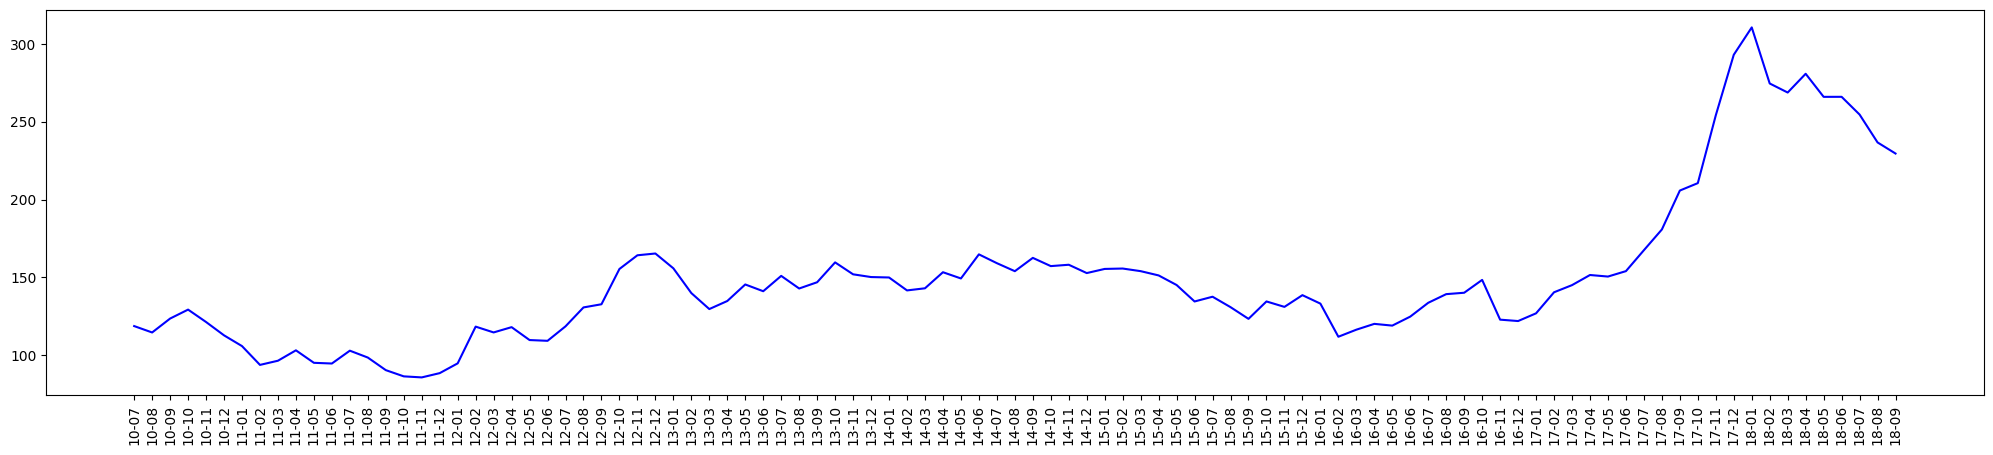

In [206]:
a = stk.groupby('Month Year')['Close'].mean()
plt.figure(figsize=(25,5))
plt.plot(a, color = 'BLUE')
plt.xticks(rotation = 'vertical')
plt.show()

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [185]:
len(X_train) , len(X_test)

(1424, 611)

In [172]:
lr=LinearRegression()
lr.fit(X_train, y_train)
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((1424,), (611,))

<Axes: >

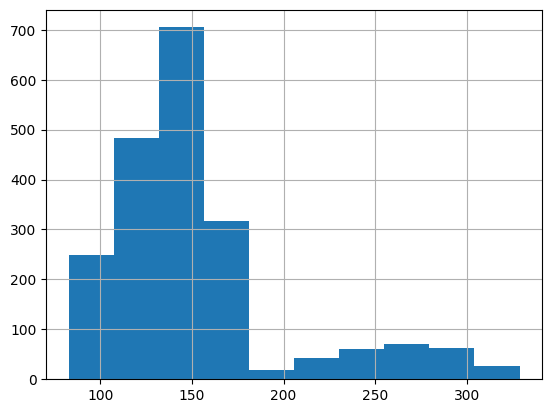

In [160]:
df['High'].hist()

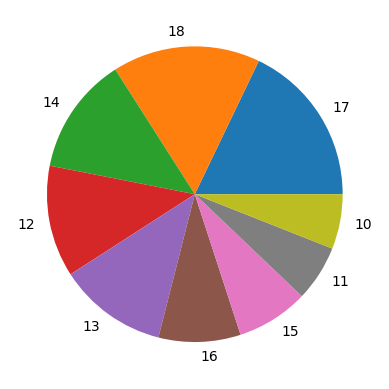

In [184]:
pc = stk[['Year', 'Total Trade Quantity']]
grp_pc = pc.groupby('Year')['Total Trade Quantity'].mean().sort_values(ascending = False).reset_index()

plt.pie(grp_pc['Total Trade Quantity'], labels=grp_pc['Year'])
plt.show()

**Calculation of Rmse**

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [145]:
print("R2Score : " ,r2_score(y_test, y_test_pred))
print("mean_absolute_error : ",mean_absolute_error(y_test, y_test_pred))
print("mean_squared_error : " ,mean_squared_error(y_test, y_test_pred))
print("Root mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2Score :  0.925738929440228
mean_absolute_error :  661.899794931475
mean_squared_error :  1610014.1055524552
Root mean_squared_error :  1268.8633123991153


In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Accuracy of Model**

In [174]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9942147091970944
R squared: 0.9942147091970944


In [ ]:
x = stk[['Close', 'Total Trade Quantity']]
y = stk['Turnover (Lacs)']
x.head()

***Visualization ***

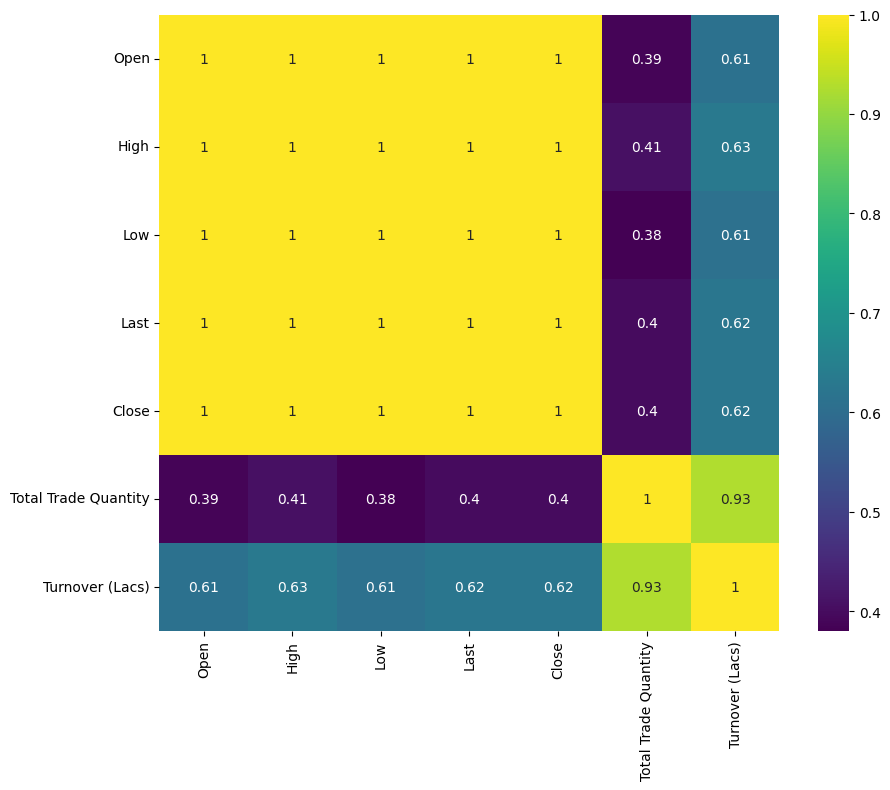

In [110]:
plt.figure(figsize = (10,8))
sns.heatmap(stk.corr(), annot = True, cmap = 'viridis')
plt.show()

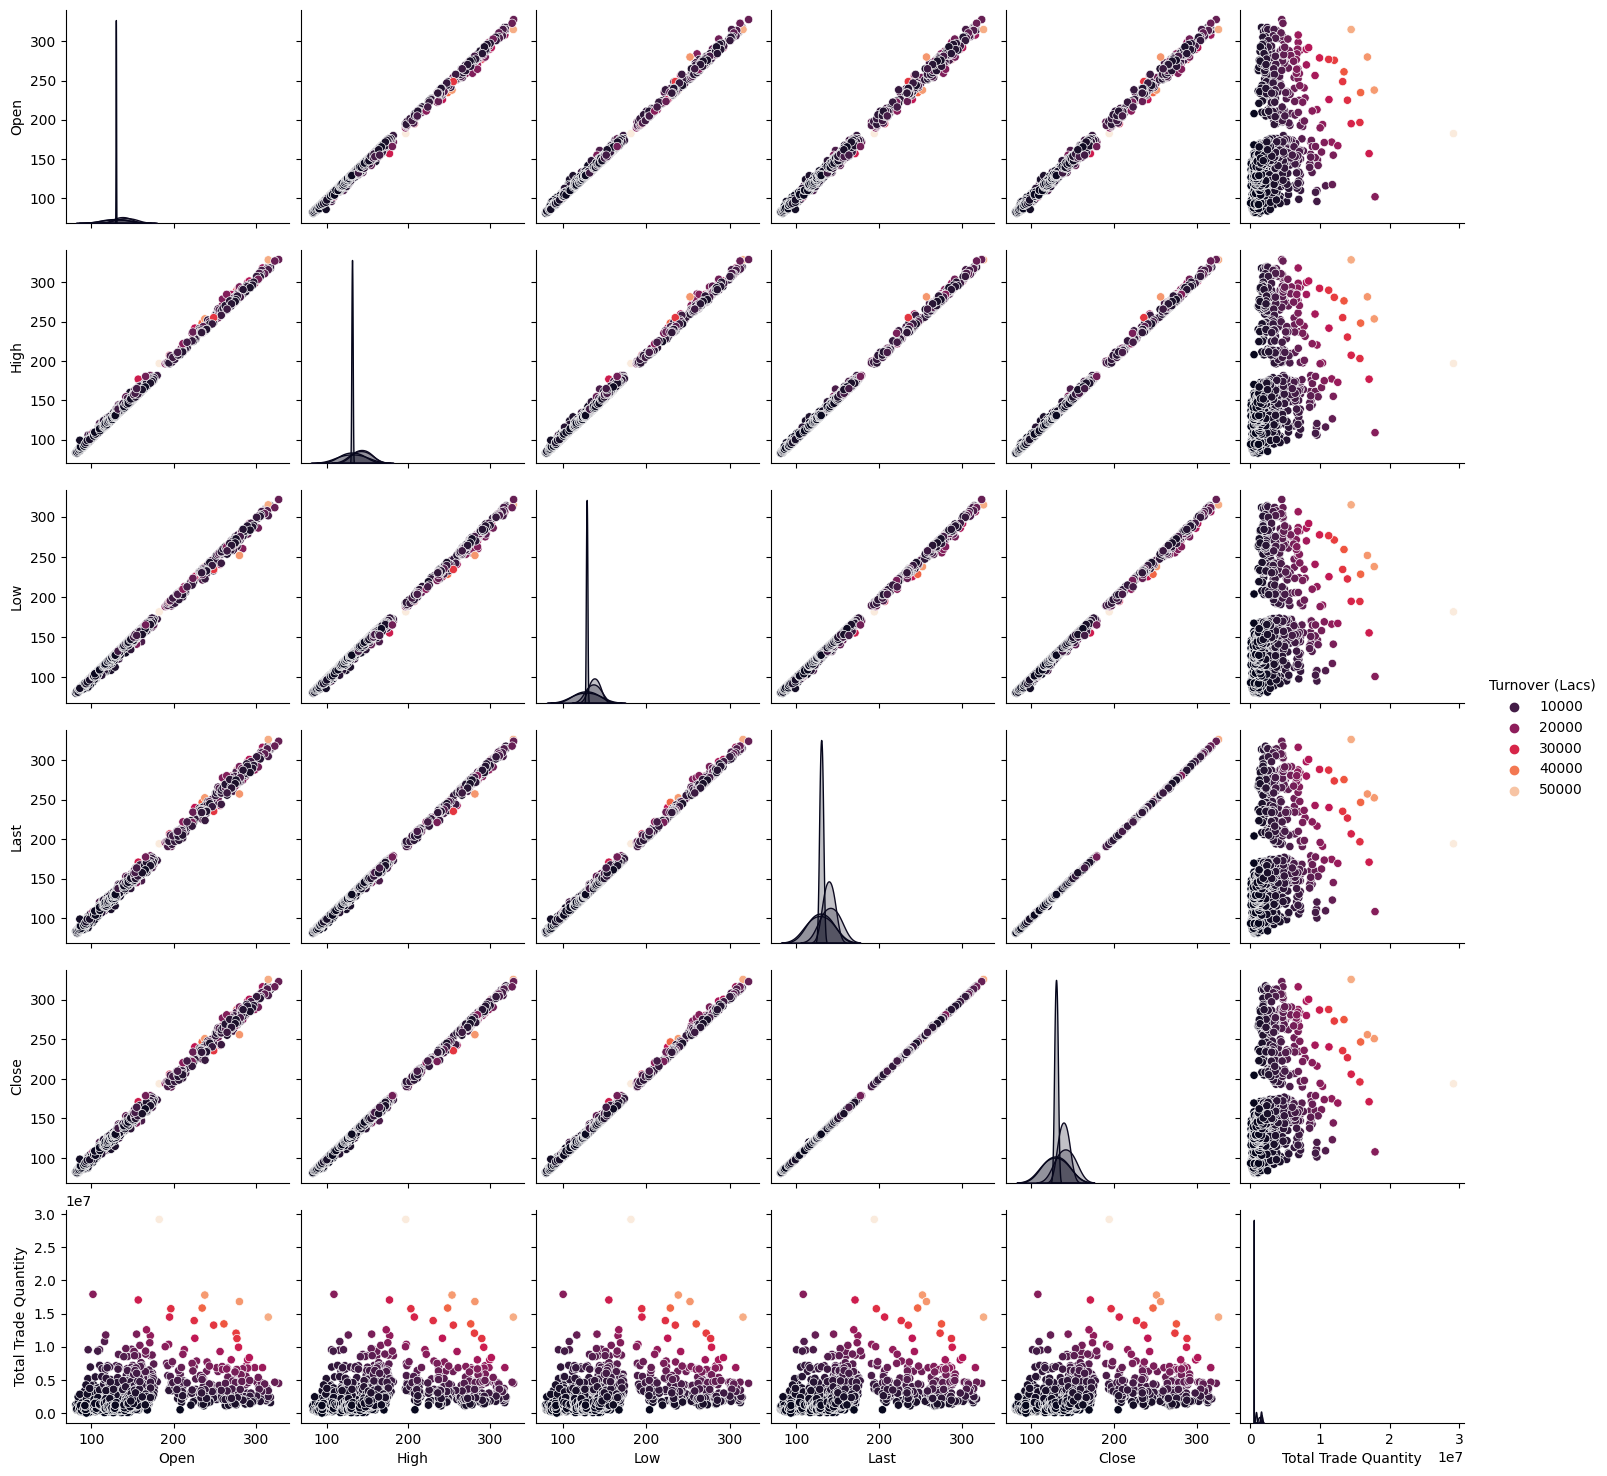

In [111]:
sns.pairplot(df, hue= 'Turnover (Lacs)', palette= "rocket")
plt.show()


In [112]:
day_new = np.arange(1,101)
day_pred = np.arange(101,116)

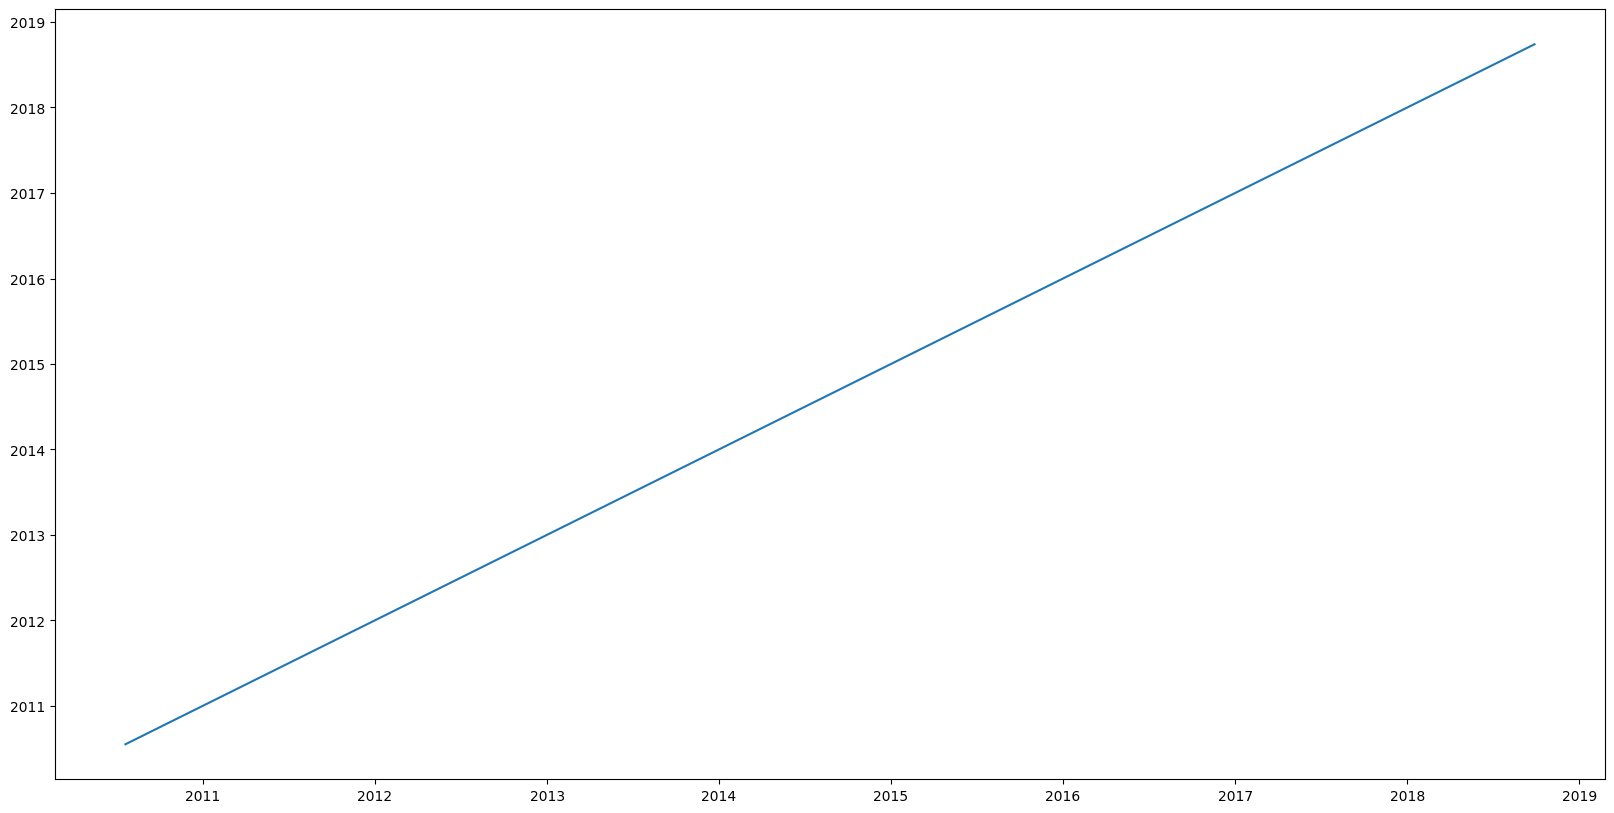

In [113]:
df["Turnover (Lacs)"]=pd.to_datetime(df.Date)
df.index=df['Turnover (Lacs)']
#data_set.head()

plt.figure(figsize=(20,10))
plt.plot(df["Turnover (Lacs)"],label='ClosePriceHist')


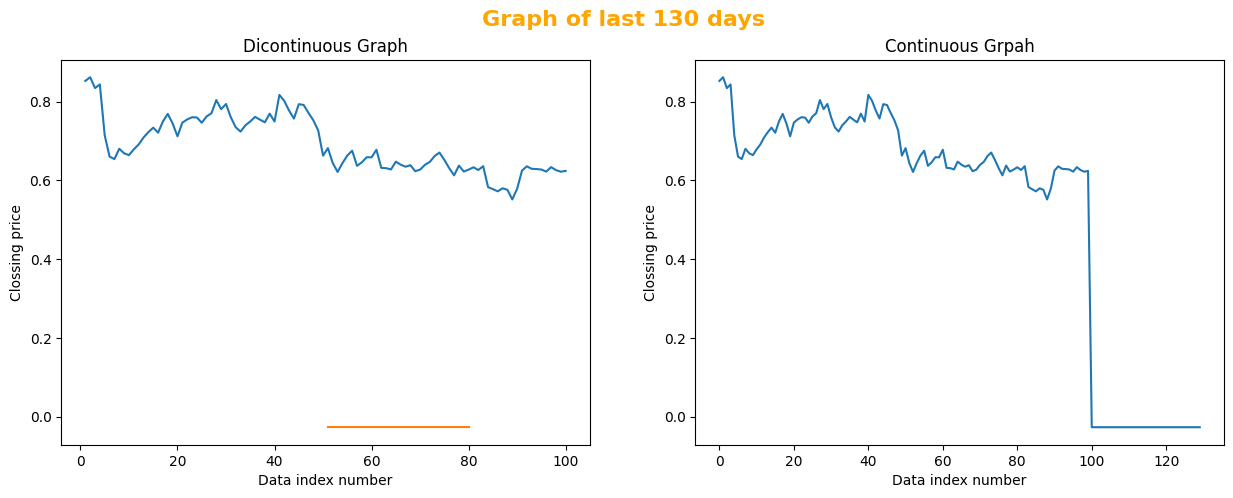

In [205]:
#Analyze the closing prices from dataframe:
fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(15,5))

ax0.plot(latest_100_days, minmax.inverse_transform(Latest_100_days_output))
ax0.plot(predicted_30_days, minmax.inverse_transform(Thirty_days_output));

ax0.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Dicontinuous Graph");



ax1.plot(minmax.inverse_transform(Latest_100_days_output_list));


ax1.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Continuous Grpah");

fig.suptitle(t="Graph of last 130 days",
             color="orange",
             fontsize=16,
             fontweight="bold");